In [1]:
import pandas as pd
import matplotlib.pyplot as plt

data_dir = "https://raw.githubusercontent.com/axchen7/vcsmc/refs/heads/iclr-figures/iclr_figures/data/"

# Compare Q Matrix


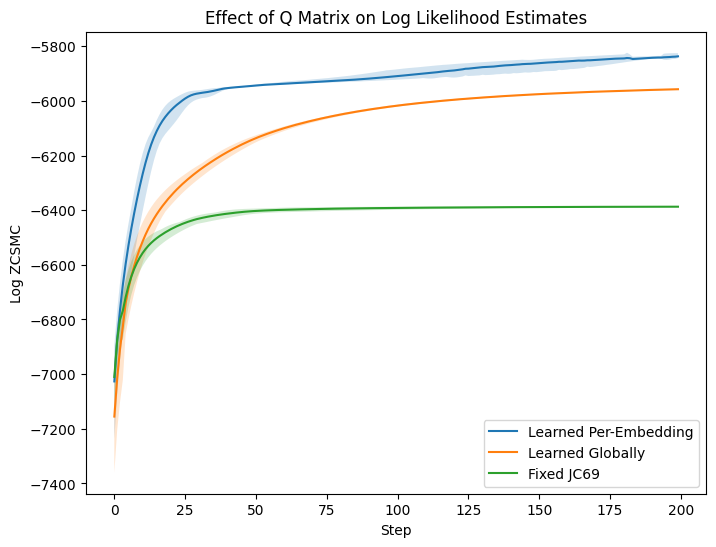

In [2]:
df = pd.read_csv(f"{data_dir}/compare_q_matrix.csv")

# Define the columns to plot
columns_to_plot = [
    (
        "Name: compare_q_matrix-mlp - Log ZCSMC",
        "Name: compare_q_matrix-mlp - Log ZCSMC__MIN",
        "Name: compare_q_matrix-mlp - Log ZCSMC__MAX",
    ),
    (
        "Name: compare_q_matrix-stationary - Log ZCSMC",
        "Name: compare_q_matrix-stationary - Log ZCSMC__MIN",
        "Name: compare_q_matrix-stationary - Log ZCSMC__MAX",
    ),
    (
        "Name: compare_q_matrix-jc69 - Log ZCSMC",
        "Name: compare_q_matrix-jc69 - Log ZCSMC__MIN",
        "Name: compare_q_matrix-jc69 - Log ZCSMC__MAX",
    ),
]

labels = [
    "Learned Per-Embedding",
    "Learned Globally",
    "Fixed JC69",
]

# Plot the data
plt.figure(figsize=(8, 6))

for (col, col_min, col_max), label in zip(columns_to_plot, labels):
    plt.plot(df["Step"], df[col], label=label)
    plt.fill_between(df["Step"], df[col_min], df[col_max], alpha=0.2)

# Add labels and title
plt.xlabel("Step")
plt.ylabel("Log ZCSMC")
plt.title("Effect of Q Matrix on Log Likelihood Estimates")
plt.legend()

# Show the plot
plt.savefig("output/q_matrix_vs_ll.pdf")
plt.show()

# Effect of K


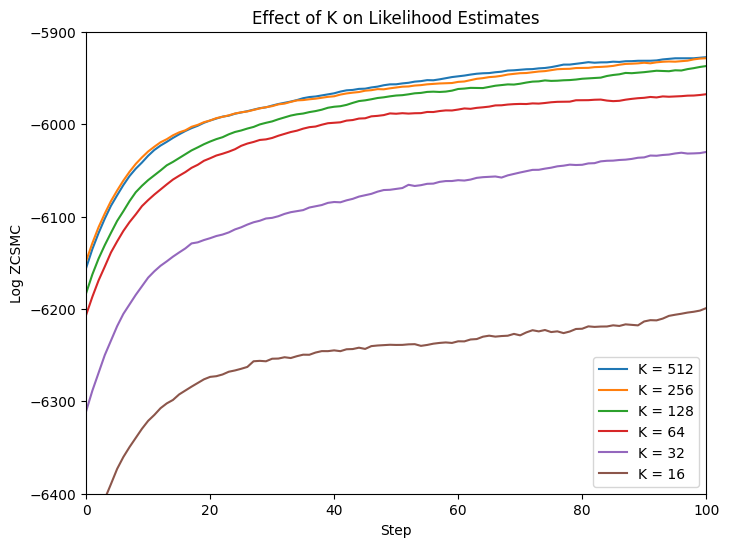

In [3]:
df = pd.read_csv(f"{data_dir}/effect_of_k.csv")

# Define the main columns to plot
columns = [
    "Name: compare_k-512 - Log ZCSMC",
    "Name: compare_k-256 - Log ZCSMC",
    "Name: compare_k-128 - Log ZCSMC",
    "Name: compare_k-64 - Log ZCSMC",
    "Name: compare_k-32 - Log ZCSMC",
    "Name: compare_k-16 - Log ZCSMC",
]

labels = [
    "K = 512",
    "K = 256",
    "K = 128",
    "K = 64",
    "K = 32",
    "K = 16",
]

# Define the window size for the running average
window_size = 50

# Apply the running average to each series
smoothed_df = df.copy()

for col in columns:
    smoothed_df[col] = df[col].rolling(window=window_size).mean()

# Shift x-axis to start from 1
smoothed_df["Step"] = smoothed_df["Step"] - window_size

# Plot the data
plt.figure(figsize=(8, 6))

for col, label in zip(columns, labels):
    plt.plot(smoothed_df["Step"], smoothed_df[col], label=label)

# Add labels and title
plt.xlabel("Step")
plt.ylabel("Log ZCSMC")
plt.title("Effect of K on Likelihood Estimates")
plt.legend()

# Limit the x-axis
plt.xlim(0, 100)

# Limit the y-axis
plt.ylim(-6400, -5900)

# Show the plot
plt.savefig("output/k_vs_ll.pdf")
plt.show()

# Benchmark on Primates


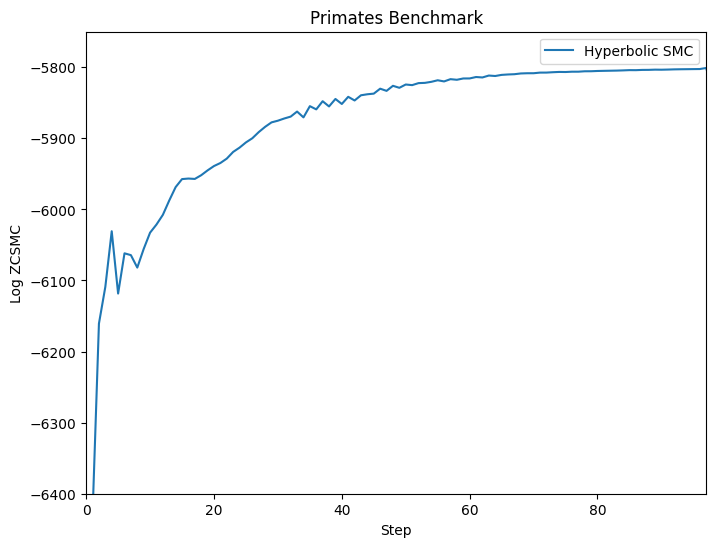

In [4]:
df = pd.read_csv(f"{data_dir}/primates_benchmark.csv")

# Define the column to plot
column = "Name: benchmark_primates-phase1 - Log ZCSMC__MAX"
label = "Hyperbolic SMC"

# Plot the data
plt.figure(figsize=(8, 6))
plt.plot(df["Step"], df[column], label=label)

# Set x-axis range
plt.xlim(0, 97)

# Set y-axis range
plt.ylim(-6400, -5750)

# Add labels and title
plt.xlabel("Step")
plt.ylabel("Log ZCSMC")
plt.title("Primates Benchmark")
plt.legend()

# Show the plot
plt.savefig("output/primates_benchmark.pdf")
plt.show()

# Benchmark on Large Datasets


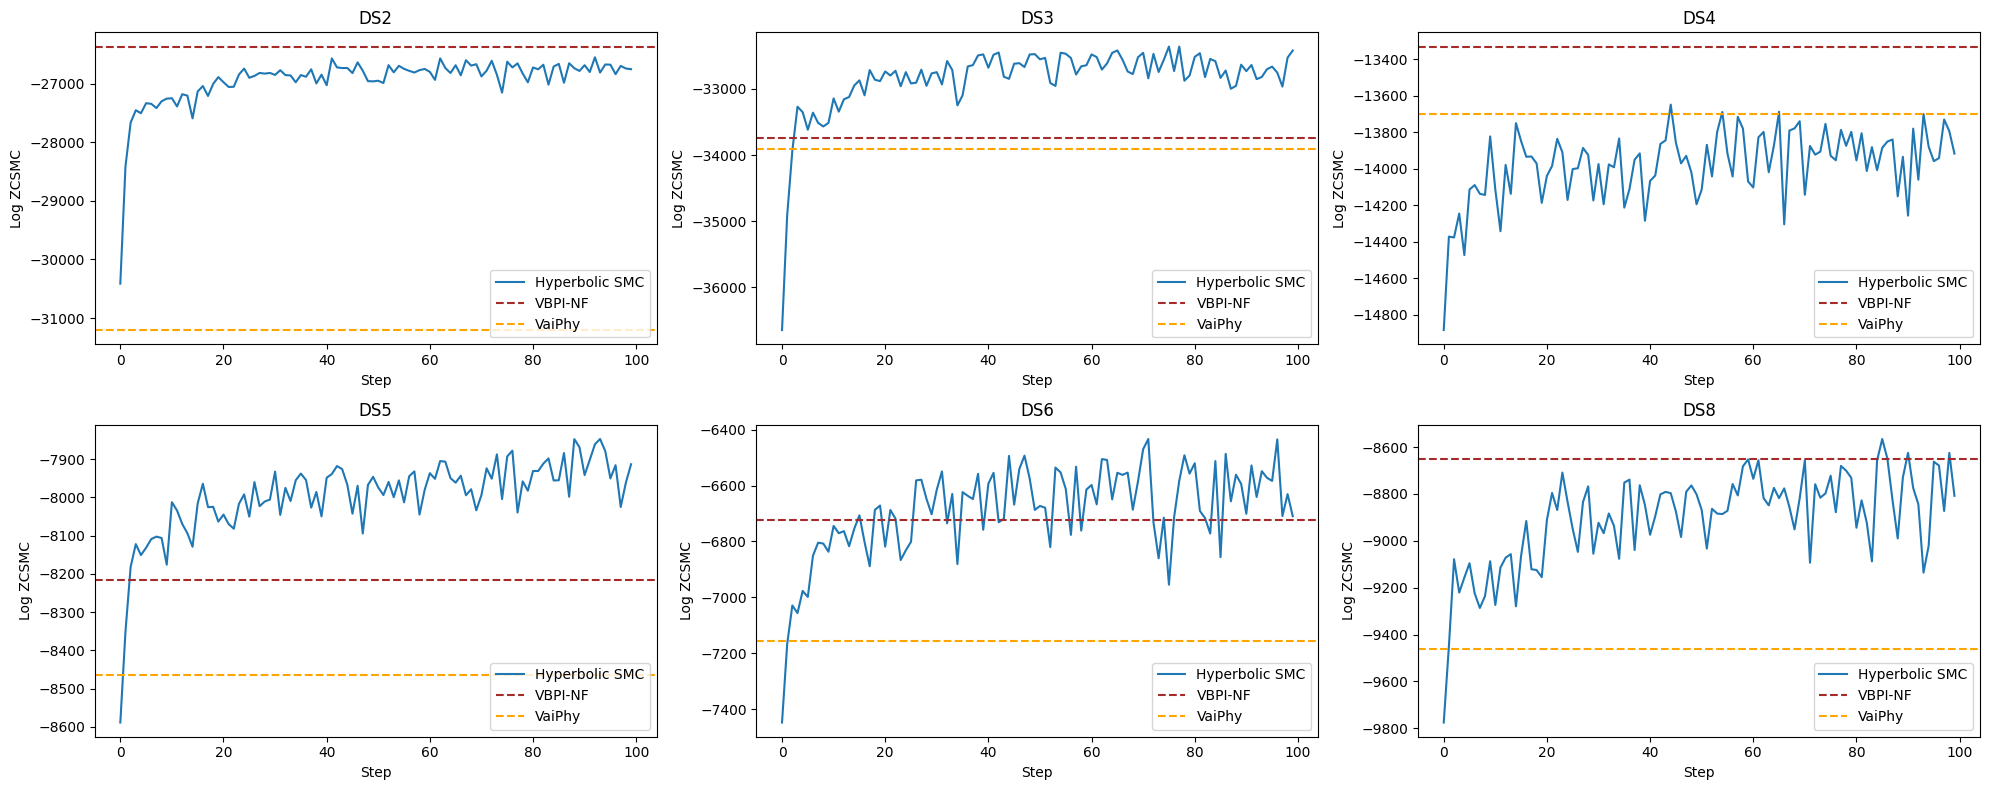

In [5]:
# ds -> (VBPI-NF, VaiPhy)
other_scores = {
    "DS2": (-26367.70, -31203.44),
    "DS3": (-33735.09, -33911.13),
    "DS4": (-13329.93, -13700.86),
    "DS5": (-8214.61, -8464.77),
    "DS6": (-6724.36, -7157.84),
    "DS8": (-8650.49, -9462.21),
}

df = pd.read_csv(f"{data_dir}/large_benchmarks.csv")

# Create a figure with 2 rows and 3 columns
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 8))

datasets = ["DS2", "DS3", "DS4", "DS5", "DS6", "DS8"]

for i, ds in enumerate(datasets):
    ax = axes[i // 3, i % 3]  # type: ignore
    ax.plot(df["Step"], df[f"{ds}-phase1 - Log ZCSMC"], label="Hyperbolic SMC")

    # Add horizontal dashed line for other methods results
    ax.axhline(y=other_scores[ds][0], color="brown", linestyle="--", label="VBPI-NF")
    ax.axhline(y=other_scores[ds][1], color="orange", linestyle="--", label="VaiPhy")

    # Add labels and title
    ax.set_xlabel("Step")
    ax.set_ylabel("Log ZCSMC")
    ax.set_title(ds)
    ax.legend(loc="lower right")

# Adjust layout
plt.tight_layout()

# Show the plot
plt.savefig("output/large_benchmarks.pdf")
plt.show()